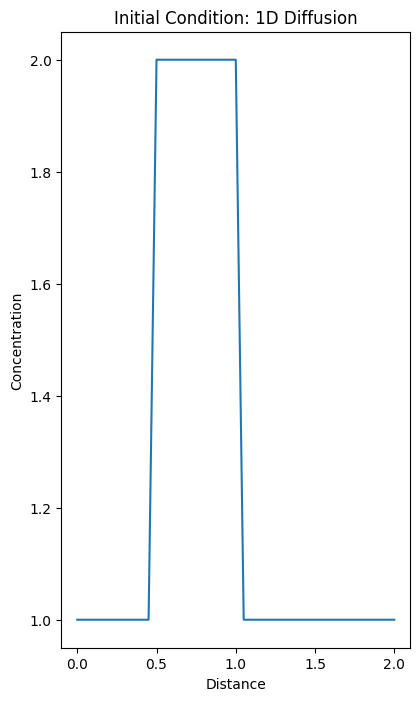

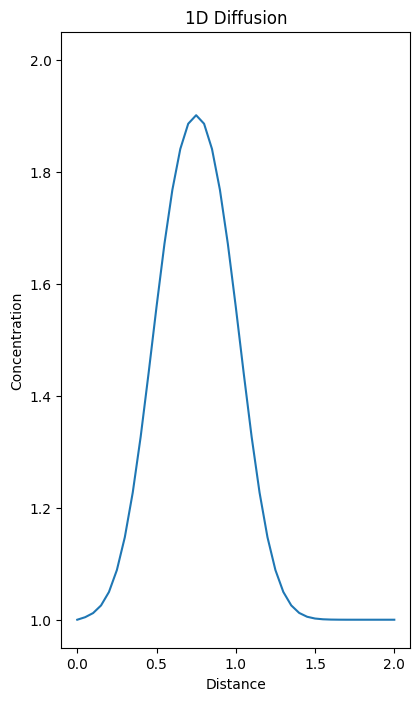

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

nx = 41 # number of spatial points
nt = 25 # number of time steps
dx = 2 / (nx - 1) # spatial step size
nu = 0.3 # diffusion coefficient
sigma = 0.2
dt = sigma * dx**2 / nu # stability condition

u = np.ones(nx) # initial condition
u[int(0.5 / dx):int(1 / dx + 1)] = 2 # set u=2 between 0.5 and 1

# Show initial shape of the function
x = np.linspace(0, 2, nx)
plt.figure(figsize=(4.5, 8))
plt.plot(x, u)
plt.xlabel('Distance')
plt.ylabel('Concentration')
plt.title('Initial Condition: 1D Diffusion')
plt.show()

un = np.ones(nx) # temporary array for the next time step

fig, ax = plt.subplots(figsize=(4.5, 8))
line, = ax.plot(x, u)
ax.set_xlabel('Distance')
ax.set_ylabel('Concentration')
ax.set_title('1D Diffusion')

def update(frame):
    global u, un
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1])
    line.set_ydata(u)
    return line,

ani = FuncAnimation(fig, update, frames=nt, blit=True, repeat=False)
ani.save('diffusion_animation.gif', writer='pillow', fps=10)
plt.show()